<a href="https://colab.research.google.com/github/AMR-21/Magic-Gamma-Telescope-Classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Data Initialization

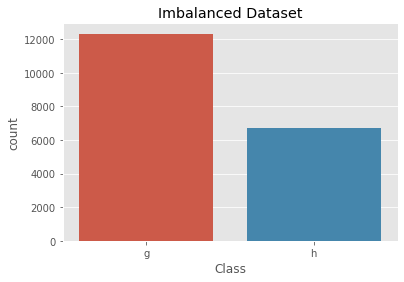

g    12332
h     6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [44]:
names= ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist',
'class']

imbalancedDataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',names=names)


X = imbalancedDataset.drop(columns=['class'])
Y = imbalancedDataset['class']

plot = sns.countplot(x=Y)
plt.title('Imbalanced Dataset')
plt.xlabel('Class')
plt.show()
print(Y.value_counts())
imbalancedDataset

# Data Balancing

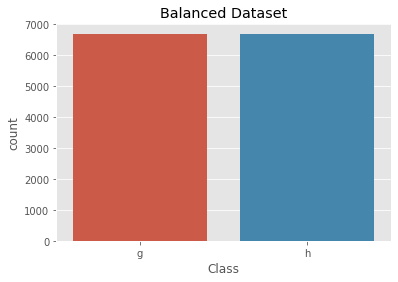

g    6688
h    6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,41.8269,26.3680,3.0422,0.2350,0.1202,24.1335,40.1360,20.4737,29.3920,173.6130,g
1,59.0164,18.0200,3.3073,0.2587,0.1422,57.7010,59.9175,15.4044,1.3107,237.6220,g
2,15.0205,12.1918,2.3560,0.6608,0.3370,1.9014,-2.0715,3.6258,89.2740,105.2140,g
3,51.4720,10.4108,2.5453,0.3276,0.1838,73.5451,17.7028,-7.1886,16.7782,176.5590,g
4,25.3814,15.7361,2.6186,0.4188,0.2419,27.8332,17.8775,5.4552,10.1725,80.3929,g
...,...,...,...,...,...,...,...,...,...,...,...
13371,85.5566,33.2663,3.0485,0.3102,0.1951,-55.8671,-55.6300,-25.2963,29.2049,324.5050,h
13372,33.3430,8.3643,2.3936,0.4970,0.2687,-0.2477,10.0291,-2.7907,61.4890,210.0610,h
13373,58.9828,34.7276,3.5862,0.1673,0.0838,27.5819,48.1584,18.6140,16.8359,219.0220,h
13374,183.0060,67.1351,3.9101,0.0776,0.0456,-182.9300,111.7160,16.1009,14.6853,184.5620,h


In [67]:
# Undersampling
under_sampler = RandomUnderSampler(random_state=42)
X,Y = under_sampler.fit_resample(X,Y)

plot = sns.countplot(x=Y)
plt.title('Balanced Dataset')
plt.xlabel('Class')
plt.show()
print(Y.value_counts())

balanced = X.copy()
balanced['class'] = Y
balanced

# Data Splitting

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7001,stratify=Y)

print("Training set")
print(y_train.value_counts())

training = X_train.copy()
training['class'] = y_train

training


Training set
g    4682
h    4682
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
3973,30.0408,14.5306,2.6698,0.4428,0.3155,16.8360,23.4254,-12.4277,9.1325,155.2790,g
8385,95.4421,57.4709,3.7277,0.1784,0.0912,-45.6153,-92.9479,-41.5289,15.6860,298.1540,h
13090,140.6142,104.4255,3.8789,0.0583,0.0390,-22.6560,59.7584,-55.2579,85.1154,295.2699,h
10456,85.0943,41.8733,3.3903,0.2678,0.1345,-84.3968,-109.8362,-21.9621,4.1744,395.0295,h
490,42.0269,22.3989,2.8454,0.2541,0.1478,4.2789,-25.6141,-19.1254,2.4092,152.0810,g
...,...,...,...,...,...,...,...,...,...,...,...
11947,82.0831,47.1104,3.6310,0.2246,0.1251,-38.9918,-103.2639,38.5361,81.4305,323.3153,h
433,92.6332,30.1404,3.6898,0.2141,0.1278,-20.7682,71.7015,14.4934,0.1230,340.8390,g
11226,111.4700,36.4754,3.3589,0.2123,0.1114,10.3615,-81.1925,-25.5691,14.1968,374.9770,h
12037,45.8362,8.3055,2.6207,0.4958,0.3317,24.0707,38.4600,8.3832,49.1250,174.7310,h


# Tuning and Cross-Validation

In [136]:
def tuneModel(model,param,k=4): 
  gscv = GridSearchCV(model, param, cv=KFold(n_splits=k))
  gscv.fit(X_train, y_train)

  fig,ax= plt.subplots()
  plt.style.use('ggplot')
  ax.plot(tuple(param.values())[0],gscv.cv_results_['mean_test_score']);
  ax.set_title('Cross-Validation plot')
  ax.set_xlabel(tuple(param.keys())[0])
  ax.set_ylabel('mean accuarcy');
  return gscv.best_estimator_,gscv.best_params_,gscv.best_score_


In [138]:
from sklearn.model_selection import KFold
kf= KFold(n_splits=4)
for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
     print(f"Fold {i+1}:")
     print(f"  Train: length={len(train_index)}")
     print(f"  Test:  length={len(test_index)}")

Fold 1:
  Train: length=7023
  Test:  length=2341
Fold 2:
  Train: length=7023
  Test:  length=2341
Fold 3:
  Train: length=7023
  Test:  length=2341
Fold 4:
  Train: length=7023
  Test:  length=2341


# Classifiers

In [75]:
def analyze(pred):
  print('Accuracy: ',accuracy_score(y_test, pred)*100 ,"%")
  print(classification_report(y_test, pred))


  fig, ax = plot_confusion_matrix(conf_mat= confusion_matrix(y_test, pred), figsize=(4, 4), cmap=plt.cm.Blues)
  ax.set_xticklabels(['', 'g', 'h'])
  ax.set_yticklabels(['', 'g', 'h']);
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


### Decision Tree

Accuracy:  79.43668993020937 %
              precision    recall  f1-score   support

           g       0.79      0.80      0.80      2006
           h       0.80      0.79      0.79      2006

    accuracy                           0.79      4012
   macro avg       0.79      0.79      0.79      4012
weighted avg       0.79      0.79      0.79      4012



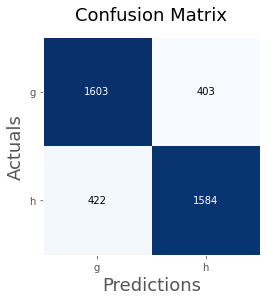

In [117]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

analyze(dt_pred)


### AdaBoost

#### Estimating value for n_estimators hyperparameter starting from 100 up to 700 with step of 30 then from 100 to 310 with step 5
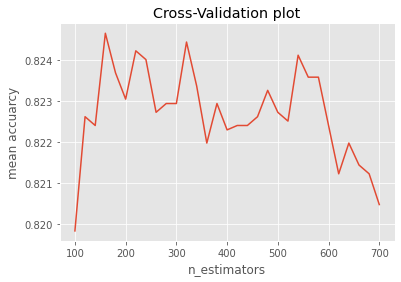

In [ ]:
AdaBoostTune = AdaBoostClassifier()
estimators = np.arange(100,340,10)
AdaBoost,best_params,best_score = tuneModel(AdaBoostTune,{"n_estimators":estimators})

# AdaBoost.fit(X_train, y_train)
# ad_pred = AdaBoost.predict(X_test)
# print(AdaBoost,best_score,"\n")

# analyze(ad_pred)


### K-NN

KNeighborsClassifier(n_neighbors=23) 0.7656984194788552 

Accuracy:  77.16849451645065 %
              precision    recall  f1-score   support

           g       0.73      0.87      0.79      2006
           h       0.84      0.67      0.75      2006

    accuracy                           0.77      4012
   macro avg       0.78      0.77      0.77      4012
weighted avg       0.78      0.77      0.77      4012



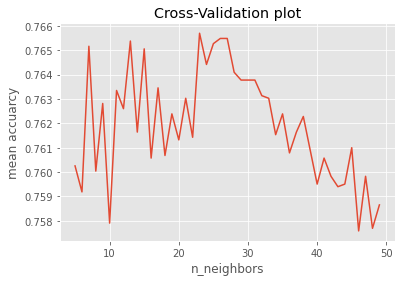

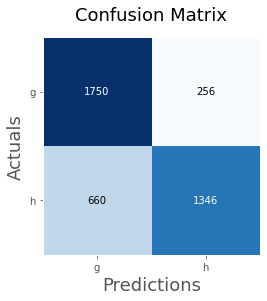

In [142]:
knnTune = KNeighborsClassifier()
k = np.arange(5, 50, 1)
knn,best_params,best_score = tuneModel(knnTune,{"n_neighbors":k})

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn,best_score,"\n")

analyze(knn_pred)

### Random Forests

In [135]:
rfTune = RandomForestClassifier()
# tuning on n_estimators = 1 to n_estimators = 500 with step = 10
restimators = np.arange(100,720,20)
rf,best_params,best_score = tuneModel(rfTune,{"n_estimators":restimators})

# rf.fit(X_train, y_train)
# rf_pred = rf.predict(X_test)
# print(rf,best_score,"\n")

# analyze(rf_pred)

KeyboardInterrupt: ignored